# **Random Forest **


> Por su robustez y precisión.




# Objetivo propuesto del análisis:
**Determinar cómo el sexo del estudiante, el tipo de gestión de la institución educativa y el área geográfica se relacionan con el rendimiento en Lectura o Matemática de los estudiantes de sexto de primaria en el año 2024.**


# Variables dependientes:
M500_EM_6P_2024_CT y M500_EM_6P_2024_MA son medidas cuantitativas del rendimiento académico en áreas clave (Comunicación y Matemática), por lo tanto, perfectamente analizables como variables respuesta.

# Variables independientes:
sexo, gestion2 y area son características sociodemográficas que se han demostrado relevantes en estudios de brechas educativas.


Uso de ponderadores (peso_Lectura y peso_Mate):

Permite ajustar el análisis a nivel muestral representativo del universo poblacional.

Etapa 1: Importación de librerías

lasificación de Nivel de Logro en Lectura usando Random Forest
Objetivo: Determinar cómo el sexo, tipo de gestión y área geográfica se relacionan con el nivel de logro en comprensión lectora de estudiantes de sexto de primaria.

Explicación:
Usamos pandas y numpy para manejar datos, matplotlib y seaborn para visualizaciones, y scikit-learn para crear y evaluar el modelo de clasificación.

In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


# 1. Instalamos librerías necesarias para trabajar con Google Sheets
!pip install --upgrade gspread gspread-dataframe

# 2. Importamos librerías de Google
import gspread
from gspread_dataframe import get_as_dataframe
from google.colab import auth
from oauth2client.client import GoogleCredentials


Etapa 2: Carga y preparación de datos

 Explicación:
Se utiliza el enlace compartido de Google Sheets, transformándolo en una URL de exportación directa como CSV (con gid=0, que corresponde a la primera hoja, "BD").
Luego, se cargan solo las columnas necesarias: sexo, gestion2, area y el nivel de logro en lectura grupo_EM_6P_2024_CT, descartando cualquier fila con valores nulos.

In [3]:
import gspread
from google.colab import auth
from google.auth import default

# Autenticarse en Google
auth.authenticate_user()

# Obtener credenciales correctas
creds, _ = default()

# Autorizar gspread con las credenciales modernas
gc = gspread.authorize(creds)




In [12]:
spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/16goZeoHV7c8HoGmZDNBSjhozXrmOok9sr_J4-XhHDhQ/edit?usp=sharing')
worksheet = spreadsheet.sheet1

# Cargar en dataframe
df = get_as_dataframe(worksheet)

# Mostrar
df.head()


,ID_IE,ID_SECCION,cor_est,cod_DRE,nom_dre,cod_UGEL,nom_ugel,codgeo,departamento,provincia,...,gestion2,area,sexo,M500_EM_6P_2024_CT,grupo_EM_6P_2024_CT,M500_EM_6P_2024_MA,grupo_EM_6P_2024_MA,peso_Lectura,peso_Mate,Estrato_DRE
0,1808,2,3,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,479.153,2.0,507.684,2.0,8.585908,8.585908,8001
1,1808,2,4,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,470.146,2.0,413.986,1.0,8.585908,8.585908,8001
2,1808,2,5,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,469.963,2.0,419.353,1.0,8.585908,8.585908,8001
3,1808,2,6,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,2,447.932,2.0,419.988,1.0,8.585908,8.585908,8001
4,1808,2,7,800,Cusco,80002,Acomayo,80201,CUSCO,ACOMAYO,...,1,1,1,519.260,2.0,549.413,3.0,8.585908,8.585908,8001


La creación de variables dummy para columnas categóricas como nom_dre, gestion2, area y sexo es crucial porque los algoritmos de machine learning, como RandomForestClassifier, requieren datos numéricos para procesar las entradas. Estas columnas contienen valores categóricos (por ejemplo, nombres de regiones en nom_dre o categorías como "Masculino"/"Femenino" en sexo) que no tienen una representación numérica inherente. Al convertirlas en variables dummy (valores binarios 0/1), cada categoría se transforma en una columna independiente, permitiendo que el modelo interprete la presencia o ausencia de cada categoría sin asumir un orden o relación numérica entre ellas. Esto evita errores de interpretación, como asumir que "Cusco" es mayor o menor que "Arequipa" en nom_dre, y asegura que el modelo capture correctamente las diferencias entre categorías, mejorando la precisión y la interpretabilidad del análisis.



In [15]:
# Lista de columnas categóricas para crear dummies (excluye identificadores si no son necesarios)
categorical_cols = ['nom_dre', 'gestion2', 'area', 'sexo']

# Crear variables dummy
df_filtered = df[categorical_cols]

df_dummies = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=False)


In [16]:
df_dummies.head()

,nom_dre_Amazonas,nom_dre_Apurímac,nom_dre_Arequipa,nom_dre_Ayacucho,nom_dre_Cajamarca,nom_dre_Callao,nom_dre_Cusco,nom_dre_Huancavelica,nom_dre_Huánuco,nom_dre_Ica,...,nom_dre_Tacna,nom_dre_Tumbes,nom_dre_Ucayali,nom_dre_Áncash,gestion2_1,gestion2_2,area_1,area_2,sexo_1,sexo_2
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,True,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,True,False


In [33]:
X = df_dummies
y = df['grupo_EM_6P_2024_CT']

In [34]:
X.shape

(105534, 32)

In [35]:
y.shape

(105534,)

In [36]:
# Verificar NaN en y
print("Valores NaN en y:", y.isna().sum())

# Eliminar filas con NaN en y (y en X correspondientemente)
mask = ~y.isna()
X = X[mask]
y = y[mask]

# Verificar que no queden NaN
print("Valores NaN en y después de limpieza:", y.isna().sum())

Valores NaN en y: 2868
Valores NaN en y después de limpieza: 0


## Para RandomForest

In [45]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=1000, random_state=50)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=1000, random_state=50)

In [47]:
# Evaluar el modelo
y_pred = model.predict(X_test)

📊 Accuracy: 0.3821

📉 Matriz de Confusión:

[[ 445 3966   84  355]
 [ 264 8315  417 1654]
 [  86 5458  472 2072]
 [  46 4116  513 2537]]


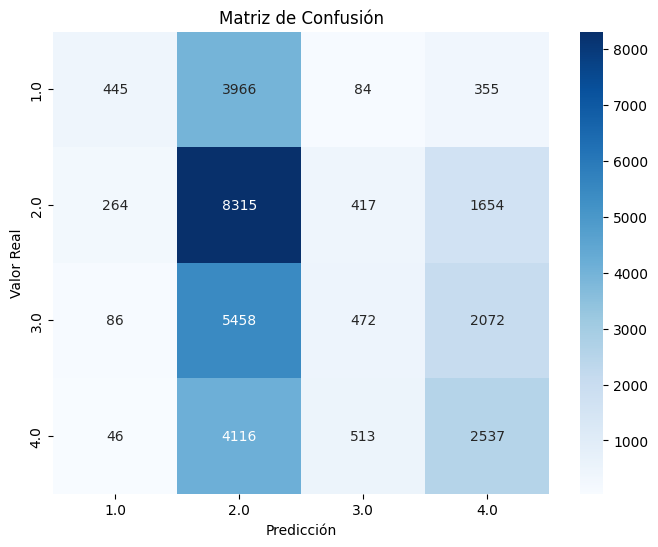

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# --- Extraer Accuracy ---
# El accuracy mide la proporción de predicciones correctas del modelo

accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Accuracy: {accuracy:.4f}")

# --- Extraer Matriz de Confusión ---
# Muestra una tabla que compara las predicciones del modelo con los valores reales, detallando los aciertos y errores por clase.


conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📉 Matriz de Confusión:\n")
print(conf_matrix)

# --- Visualizar la Matriz de Confusión (opcional) ---
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

## Para Support Vector Machines

📊 Accuracy: 0.3762

📉 Matriz de Confusión:

[[ 638 3996   16  200]
 [ 598 8919   40 1093]
 [ 248 6164   57 1619]
 [ 231 4943   66 1972]]


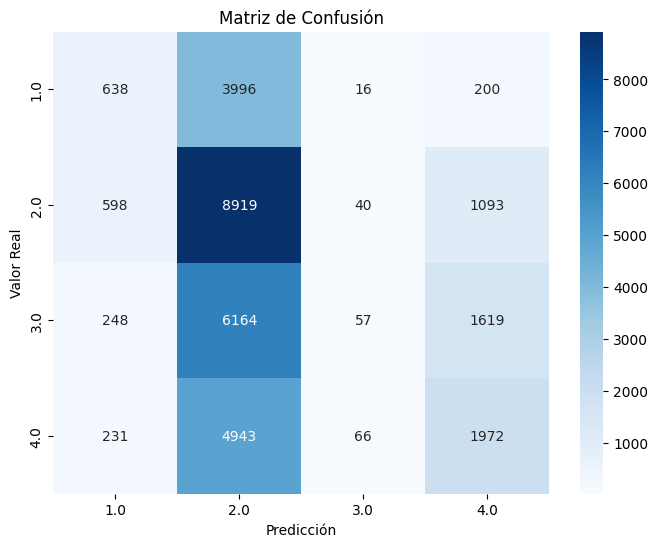


📋 Reporte de Clasificación:

              precision    recall  f1-score   support

         1.0       0.37      0.13      0.19      4850
         2.0       0.37      0.84      0.51     10650
         3.0       0.32      0.01      0.01      8088
         4.0       0.40      0.27      0.33      7212

    accuracy                           0.38     30800
   macro avg       0.37      0.31      0.26     30800
weighted avg       0.37      0.38      0.29     30800



In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo SVM
model = SVC(kernel='linear', random_state=50)  # Puedes cambiar el kernel según el caso
model.fit(X_train, y_train) # El entrenamiento tarda >10 minutos en colab

# Evaluar el modelo
y_pred = model.predict(X_test)

# Extraer y mostrar métricas
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📉 Matriz de Confusión:\n")
print(conf_matrix)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Reporte de clasificación
print("\n📋 Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

Sugerencias:

- Probar con los grupos de las notas ('grupo_EM_6P_2024_MA')
- Probar con diferentes tamaños de RandomForest
- Probar con otros kernels de 'rbf' , 'poly', 'sigmoid'

In [ ]:
# Para usar en entornos externos

import pandas as pd
import joblib
from openpyxl import load_workbook

# Cargar el modelo
model = joblib.load('svm_model.joblib')

# Leer datos de entrada desde Excel
X_new = pd.read_excel('nuevos_datos.xlsx')

# Generar predicciones
predictions = model.predict(X_new)

# Guardar predicciones en el mismo archivo Excel
output_df = pd.DataFrame({'Predicciones': predictions})
output_df.to_excel('nuevos_datos_con_predicciones.xlsx', index=False)